<a href="https://colab.research.google.com/github/conradperes/spark/blob/master/Ensino_superior_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pyspark.pandas as ps

In [65]:
!pip install lxml

In [66]:

url = 'https://pt.wikipedia.org/wiki/Ensino_superior_no_Brasil'
lista = ps.read_html(url)

In [67]:

df_publicas=lista[0]
df_publicas

Classificação Nacional  Classificação Mundial                            Universidade  Logo    sigla              tipo              web       Localização
0                       1                     72               Universidade de São Paulo   NaN      USP  Pública Estadual     www5.usp.br/         São Paulo
1                       2                    236       Universidade Estadual de Campinas   NaN  UNICAMP  Pública Estadual  www.unicamp.br/         São Paulo
2                       3                    278  Universidade Federal do Rio de Janeiro   NaN     UFRJ   Pública federal         ufrj.br/    Rio de Janeiro
3                       4                    298    Universidade Federal de Minas Gerais   NaN     UFMG   Pública federal       ucb.edu.bo      Minas Gerais
4                       5                    345          Universidade Estadual Paulista   NaN    UNESP  Pública Estadual     www.unesp.br         São Paulo
5                       6                    427  Universidade Federal de Santa Catarina   NaN     UFSC   Pública federal         ufsc.br/    Santa Catarina
6                       7                    592                Universidade de Brasília   NaN      UNB  Pública Estadual      www.unb.br/  Distrito Federal
7                       8                    593          Universidade Federal do Paraná   NaN     UFPR   Pública federal     www.ufpr.br/            Paraná
8                       9                    596         Universidade Federal Fluminense   NaN      UFF   Pública federal      www.uff.br/    Rio de Janeiro
9                      10                    667      Universidade Federal de São Carlos   NaN   UFSCAR   Pública federal   www.ufscar.br/         São Paulo

In [68]:
df_publicas.sort_values(by=['Classificação Nacional'],inplace=True,ascending=False)

In [69]:

fig=df_publicas.plot.bar(x='sigla',y='Classificação Nacional',color=range(10))
fig.layout.coloraxis.showscale = False

fig.show()

In [70]:
dfs_bolsas = df_bolsas.to_spark()
dfs_bolsas.show()

df_publicas2 = ps.read_parquet('/FileStore/tables/publicas.parquet')
df_publicas2

NameError: name 'df_bolsas' is not defined

In [71]:
local_arquivo = '/content/fies_2021.csv'

In [72]:
df = ps.read_csv(local_arquivo,sep=';',index_col='ID do estudante')

In [73]:
df.head(1)

Ano do processo seletivo  Semestre do processo seletivo Sexo Data de Nascimento UF de resid�ncia Municipio de resid�ncia Etnia/Cor Pessoa com defici�ncia? Tipo de escola no ensino m�dio  Ano conclus�o ensino m�dio Concluiu curso superior? Professor rede p�blica ensino?  N� de membros Grupo Familiar Renda familiar mensal bruta Renda mensal bruta per capita Regi�o grupo de prefer�ncia      UF  Cod.Microrregi�o Microrregi�o  Cod.Mesorregi�o                Mesorregi�o Conceito de curso do GP                                         �rea do conhecimento                        Sub�rea do conhecimento  Cod. do Grupo de prefer�ncia Nota Corte Grupo Prefer�ncia  Op��es de cursos da inscri��o                        Nome mantenedora                                                               Natureza Jur�dica Mantenedora  CNPJ da mantenedora  C�digo e-MEC da Mantenedora                                 Nome da IES  C�digo e-MEC da IES Organiza��o Acad�mica da IES Munic�pio da IES UF da IES  Nome do Local de oferta  C�digo do Local de Oferta Mun�cipio do Local de Oferta UF do Local de Oferta  C�digo do curso Nome do curso    Turno       Grau Conceito M�dia nota Enem  Ano do Enem  Reda��o Matem�tica e suas Tecnologias Linguagens, C�digos e suas Tec Ci�ncias Natureza e suas Tec Ci�ncias Humanas e suas Tec                Situa��o Inscri��o Fies Percentual de financiamento Semestre do financiamento  Qtde semestre financiado
ID do estudante                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
205517284                            2021                              1    M           22/12/88               PR                CURITIBA     PARDA                     SIM                            SIM                        2009                      SIM                            N�O                             1                        2090                          1045                         SUL  PARAN�             41037     CURITIBA             4110  METROPOLITANA DE CURITIBA                       4  CURSOS DA �REA DE LICENCIATURA, PEDAGOGIA E NORMAL SUPERIOR  ARTES, CI�NCIAS SOCIAIS E CURSOS RELACIONADOS                        121325                       450,14                              1  ASSOCIACAO PARANAENSE DE CULTURA - APC  PESSOA JUR�DICA DE DIREITO PRIVADO - SEM FINS LUCRATIVOS - ASSOCIA��O DE UTILIDADE P�BLICA       76659820000151                           10  PONTIF�CIA UNIVERSIDADE CAT�LICA DO PARAN�                   10                 UNIVERSIDADE         CURITIBA        PR  PUCPR - CAMPUS CURITIBA                     657676                     CURITIBA                    PR      

In [74]:
df.dropna(inplace=True)

In [75]:
resultado = ps.sql('''
SELECT Sexo, COUNT(Sexo) AS Total
FROM {DF}
GROUP BY Sexo
''',DF=df)

In [76]:
resultado

Sexo  Total
0    F  12784
1    M   5400

In [77]:
resultado.plot.bar(x='Sexo', y='Total')

In [78]:
import re

# Função para renomear colunas
def clean_column_names_ps(columns):
    new_columns = []
    for col in columns:
        # Remove caracteres especiais, substitui espaços por underline e converte para minúsculas
        new_col = re.sub(r'[^\w\s]', '', col)  # Remove caracteres especiais
        new_col = re.sub(r'\s+', '_', new_col.strip())  # Substitui espaços por _
        new_columns.append(new_col.lower())  # Converte para minúsculas
    return new_columns

# Renomeando as colunas do DataFrame Pandas on Spark
df.columns = clean_column_names_ps(df.columns)

# Query com as novas colunas
query_result = ps.sql('''
SELECT *
FROM {DF}
''', DF=df)

display(query_result)


ano_do_processo_seletivo  semestre_do_processo_seletivo sexo data_de_nascimento uf_de_residncia       municipio_de_residncia etniacor pessoa_com_deficincia tipo_de_escola_no_ensino_mdio  ano_concluso_ensino_mdio concluiu_curso_superior professor_rede_pblica_ensino  n_de_membros_grupo_familiar renda_familiar_mensal_bruta renda_mensal_bruta_per_capita regio_grupo_de_preferncia                  uf  codmicrorregio                 microrregio  codmesorregio                        mesorregio conceito_de_curso_do_gp                                          rea_do_conhecimento                                                                   subrea_do_conhecimento  cod_do_grupo_de_preferncia nota_corte_grupo_preferncia  opes_de_cursos_da_inscrio                                                  nome_mantenedora                                                                natureza_jurdica_mantenedora  cnpj_da_mantenedora  cdigo_emec_da_mantenedora                                                                       nome_da_ies  cdigo_emec_da_ies organizao_acadmica_da_ies        municpio_da_ies uf_da_ies                                                      nome_do_local_de_oferta  cdigo_do_local_de_oferta muncipio_do_local_de_oferta uf_do_local_de_oferta  cdigo_do_curso                                  nome_do_curso       turno       grau    conceito mdia_nota_enem  ano_do_enem  redao matemtica_e_suas_tecnologias linguagens_cdigos_e_suas_tec cincias_natureza_e_suas_tec cincias_humanas_e_suas_tec situao_inscrio_fies percentual_de_financiamento semestre_do_financiamento  qtde_semestre_financiado
0                        2021                              1    M           10/08/01              PR                     CURITIBA   BRANCA                   N�O                           N�O                      2018                     N�O                          N�O                            5                     5517,85                        919,64                       SUL              PARAN�           41037                    CURITIBA           4110         METROPOLITANA DE CURITIBA                       4  CURSOS DA �REA DE LICENCIATURA, PEDAGOGIA E NORMAL SUPERIOR                                            ARTES, CI�NCIAS SOCIAIS E CURSOS RELACIONADOS                      121325                      450,14                          1                            ASSOCIACAO PARANAENSE DE CULTURA - APC  PESSOA JUR�DICA DE DIREITO PRIVADO - SEM FINS LUCRATIVOS - ASSOCIA��O DE UTILIDADE P�BLICA       76659820000151                         10                                        PONTIF�CIA UNIVERSIDADE CAT�LICA DO PARAN�                 10              UNIVERSIDADE               CURITIBA        PR                                                      PUCPR - CAMPUS CURITIBA                    657676                    CURITIBA                    PR             849                                      FILOSOFIA     NOTURNO  SEMESTRAL           4          581,2         2019    620                        636,8                        538,9                       519,1                      591,2          CONTRATADA                       54,26                        1�                         8
1                        2021                              1    F           16/06/00              PR                     CURITIBA   BRANCA                   N�O                           SIM                      2018                     N�O                          N�O                            3                     6036,52                       1509,13                       SUL              PARAN�           41037                    CURITIBA           4110         METROPOLITANA DE CURITIBA                       4  CURSOS DA �REA DE LICENCIATURA, PEDAGOGIA E NORMAL SUPERIOR                                                                                PEDAGOGIA                      121330                      546,18                          1                 

In [18]:
ps.sql('''
SELECT avg(media_nota_enem),  nome_do_curso , turno, uf_do_local_de_oferta
FROM {DF}
WHERE turno = 'INTEGRAL'
and nome_do_curso like '%MEDICINA%'
group by nome_do_curso, turno, media_nota_enem, uf_do_local_de_oferta
limit 10
''',DF=df)


AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `media_nota_enem` cannot be resolved. Did you mean one of the following? [`mdia_nota_enem`, `ano_do_enem`, `cdigo_do_curso`, `etniacor`, `municpio_da_ies`].; line 2 pos 11;
'GlobalLimit 10
+- 'LocalLimit 10
   +- 'Aggregate [nome_do_curso#1488, turno#1489, 'media_nota_enem, uf_do_local_de_oferta#1486], [unresolvedalias('avg('media_nota_enem), None), nome_do_curso#1488, turno#1489, uf_do_local_de_oferta#1486]
      +- Filter ((turno#1489 = INTEGRAL) AND nome_do_curso#1488 LIKE %MEDICINA%)
         +- SubqueryAlias _pandas_api_b33247f633334b34b6734fc8c51b75e0
            +- View (`_pandas_api_b33247f633334b34b6734fc8c51b75e0`, [ano_do_processo_seletivo#1447,semestre_do_processo_seletivo#1448,sexo#1449,data_de_nascimento#1450,uf_de_residncia#1451,municipio_de_residncia#1452,etniacor#1453,pessoa_com_deficincia#1454,tipo_de_escola_no_ensino_mdio#1455,ano_concluso_ensino_mdio#1456,concluiu_curso_superior#1457,professor_rede_pblica_ensino#1458,n_de_membros_grupo_familiar#1459,renda_familiar_mensal_bruta#1460,renda_mensal_bruta_per_capita#1461,regio_grupo_de_preferncia#1462,uf#1463,codmicrorregio#1464,microrregio#1465,codmesorregio#1466,mesorregio#1467,conceito_de_curso_do_gp#1468,rea_do_conhecimento#1469,subrea_do_conhecimento#1470,cod_do_grupo_de_preferncia#1471,nota_corte_grupo_preferncia#1472,opes_de_cursos_da_inscrio#1473,nome_mantenedora#1474,natureza_jurdica_mantenedora#1475,cnpj_da_mantenedora#1476L,cdigo_emec_da_mantenedora#1477,nome_da_ies#1478,cdigo_emec_da_ies#1479,organizao_acadmica_da_ies#1480,municpio_da_ies#1481,uf_da_ies#1482,nome_do_local_de_oferta#1483,cdigo_do_local_de_oferta#1484,muncipio_do_local_de_oferta#1485,uf_do_local_de_oferta#1486,cdigo_do_curso#1487,nome_do_curso#1488,turno#1489,grau#1490,conceito#1491,mdia_nota_enem#1492,ano_do_enem#1493,redao#1494,matemtica_e_suas_tecnologias#1495,linguagens_cdigos_e_suas_tec#1496,cincias_natureza_e_suas_tec#1497,cincias_humanas_e_suas_tec#1498,situao_inscrio_fies#1499,percentual_de_financiamento#1500,semestre_do_financiamento#1501,qtde_semestre_financiado#1502])
               +- Project [Ano do processo seletivo#191 AS ano_do_processo_seletivo#1447, Semestre do processo seletivo#192 AS semestre_do_processo_seletivo#1448, Sexo#194 AS sexo#1449, Data de Nascimento#195 AS data_de_nascimento#1450, UF de resid�ncia#196 AS uf_de_residncia#1451, Municipio de resid�ncia#197 AS municipio_de_residncia#1452, Etnia/Cor#198 AS etniacor#1453, Pessoa com defici�ncia?#199 AS pessoa_com_deficincia#1454, Tipo de escola no ensino m�dio#200 AS tipo_de_escola_no_ensino_mdio#1455, Ano conclus�o ensino m�dio#201 AS ano_concluso_ensino_mdio#1456, Concluiu curso superior?#202 AS concluiu_curso_superior#1457, Professor rede p�blica ensino?#203 AS professor_rede_pblica_ensino#1458, N� de membros Grupo Familiar#204 AS n_de_membros_grupo_familiar#1459, Renda familiar mensal bruta#205 AS renda_familiar_mensal_bruta#1460, Renda mensal bruta per capita#206 AS renda_mensal_bruta_per_capita#1461, Regi�o grupo de prefer�ncia#207 AS regio_grupo_de_preferncia#1462, UF#208 AS uf#1463, Cod.Microrregi�o#209 AS codmicrorregio#1464, Microrregi�o#210 AS microrregio#1465, Cod.Mesorregi�o#211 AS codmesorregio#1466, Mesorregi�o#212 AS mesorregio#1467, Conceito de curso do GP#213 AS conceito_de_curso_do_gp#1468, �rea do conhecimento#214 AS rea_do_conhecimento#1469, Sub�rea do conhecimento#215 AS subrea_do_conhecimento#1470, ... 32 more fields]
                  +- Project [ID do estudante#193, Ano do processo seletivo#191, Semestre do processo seletivo#192, Sexo#194, Data de Nascimento#195, UF de resid�ncia#196, Municipio de resid�ncia#197, Etnia/Cor#198, Pessoa com defici�ncia?#199, Tipo de escola no ensino m�dio#200, Ano conclus�o ensino m�dio#201, Concluiu curso superior?#202, Professor rede p�blica ensino?#203, N� de membros Grupo Familiar#204, Renda familiar mensal bruta#205, Renda mensal bruta per capita#206, Regi�o grupo de prefer�ncia#207, UF#208, Cod.Microrregi�o#209, Microrregi�o#210, Cod.Mesorregi�o#211, Mesorregi�o#212, Conceito de curso do GP#213, �rea do conhecimento#214, ... 34 more fields]
                     +- Project [ID do estudante#193, Ano do processo seletivo#191, Semestre do processo seletivo#192, Sexo#194, Data de Nascimento#195, UF de resid�ncia#196, Municipio de resid�ncia#197, Etnia/Cor#198, Pessoa com defici�ncia?#199, Tipo de escola no ensino m�dio#200, Ano conclus�o ensino m�dio#201, Concluiu curso superior?#202, Professor rede p�blica ensino?#203, N� de membros Grupo Familiar#204, Renda familiar mensal bruta#205, Renda mensal bruta per capita#206, Regi�o grupo de prefer�ncia#207, UF#208, Cod.Microrregi�o#209, Microrregi�o#210, Cod.Mesorregi�o#211, Mesorregi�o#212, Conceito de curso do GP#213, �rea do conhecimento#214, ... 33 more fields]
                        +- Filter (((((((((((((((((((((((((((((((((((((((((((((((((((((((((0 + CASE WHEN NOT isnull(Ano do processo seletivo#191) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Semestre do processo seletivo#192) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Sexo#194) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Data de Nascimento#195) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(UF de resid�ncia#196) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Municipio de resid�ncia#197) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Etnia/Cor#198) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Pessoa com defici�ncia?#199) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Tipo de escola no ensino m�dio#200) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Ano conclus�o ensino m�dio#201) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Concluiu curso superior?#202) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Professor rede p�blica ensino?#203) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(N� de membros Grupo Familiar#204) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Renda familiar mensal bruta#205) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Renda mensal bruta per capita#206) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Regi�o grupo de prefer�ncia#207) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(UF#208) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Cod.Microrregi�o#209) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Microrregi�o#210) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Cod.Mesorregi�o#211) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Mesorregi�o#212) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Conceito de curso do GP#213) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(�rea do conhecimento#214) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Sub�rea do conhecimento#215) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Cod. do Grupo de prefer�ncia#216) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Nota Corte Grupo Prefer�ncia#217) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Op��es de cursos da inscri��o#218) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Nome mantenedora#219) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Natureza Jur�dica Mantenedora#220) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(CNPJ da mantenedora#221L) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(C�digo e-MEC da Mantenedora#222) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Nome da IES#223) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(C�digo e-MEC da IES#224) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Organiza��o Acad�mica da IES#225) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Munic�pio da IES#226) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(UF da IES#227) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Nome do Local de oferta#228) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(C�digo do Local de Oferta#229) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Mun�cipio do Local de Oferta#230) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(UF do Local de Oferta#231) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(C�digo do curso#232) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Nome do curso#233) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Turno#234) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Grau#235) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Conceito#236) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(M�dia nota Enem#237) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Ano do Enem#238) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Reda��o#239) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Matem�tica e suas Tecnologias#240) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Linguagens, C�digos e suas Tec#241) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Ci�ncias Natureza e suas Tec#242) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Ci�ncias Humanas e suas Tec#243) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Situa��o Inscri��o Fies#244) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Percentual de financiamento#245) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Semestre do financiamento#246) THEN 1 ELSE 0 END) + CASE WHEN NOT isnull(Qtde semestre financiado#247) THEN 1 ELSE 0 END) = 56)
                           +- Project [Ano do processo seletivo#191, Semestre do processo seletivo#192, ID do estudante#193, Sexo#194, Data de Nascimento#195, UF de resid�ncia#196, Municipio de resid�ncia#197, Etnia/Cor#198, Pessoa com defici�ncia?#199, Tipo de escola no ensino m�dio#200, Ano conclus�o ensino m�dio#201, Concluiu curso superior?#202, Professor rede p�blica ensino?#203, N� de membros Grupo Familiar#204, Renda familiar mensal bruta#205, Renda mensal bruta per capita#206, Regi�o grupo de prefer�ncia#207, UF#208, Cod.Microrregi�o#209, Microrregi�o#210, Cod.Mesorregi�o#211, Mesorregi�o#212, Conceito de curso do GP#213, �rea do conhecimento#214, ... 34 more fields]
                              +- Relation [Ano do processo seletivo#191,Semestre do processo seletivo#192,ID do estudante#193,Sexo#194,Data de Nascimento#195,UF de resid�ncia#196,Municipio de resid�ncia#197,Etnia/Cor#198,Pessoa com defici�ncia?#199,Tipo de escola no ensino m�dio#200,Ano conclus�o ensino m�dio#201,Concluiu curso superior?#202,Professor rede p�blica ensino?#203,N� de membros Grupo Familiar#204,Renda familiar mensal bruta#205,Renda mensal bruta per capita#206,Regi�o grupo de prefer�ncia#207,UF#208,Cod.Microrregi�o#209,Microrregi�o#210,Cod.Mesorregi�o#211,Mesorregi�o#212,Conceito de curso do GP#213,�rea do conhecimento#214,... 33 more fields] csv


In [79]:
cursos_ordenados = ps.sql('''
SELECT
    AVG(mdia_nota_enem) AS media_nota_enem,
    nome_do_curso,
    turno,
    uf_do_local_de_oferta
FROM {DF}
WHERE turno = 'INTEGRAL'
  AND nome_do_curso LIKE '%MEDICINA%'
GROUP BY nome_do_curso, turno, uf_do_local_de_oferta
''', DF=df)

display(cursos_ordenados)


media_nota_enem         nome_do_curso     turno uf_do_local_de_oferta
0        677.000000              MEDICINA  INTEGRAL                    MS
1               NaN              MEDICINA  INTEGRAL                    PB
2               NaN              MEDICINA  INTEGRAL                    MA
3               NaN              MEDICINA  INTEGRAL                    GO
4        751.000000              MEDICINA  INTEGRAL                    CE
5               NaN              MEDICINA  INTEGRAL                    AL
6        718.500000              MEDICINA  INTEGRAL                    SP
7        723.750000              MEDICINA  INTEGRAL                    BA
8        726.142857              MEDICINA  INTEGRAL                    MG
9               NaN              MEDICINA  INTEGRAL                    SC
10              NaN           BIOMEDICINA  INTEGRAL                    RS
11              NaN  MEDICINA VETERIN�RIA  INTEGRAL                    RJ
12              NaN              MEDICINA  INTEGRAL                    SE
13       468.000000  MEDICINA VETERIN�RIA  INTEGRAL                    RS
14              NaN              MEDICINA  INTEGRAL                    RN
15              NaN  MEDICINA VETERIN�RIA  INTEGRAL                    AM
16              NaN  MEDICINA VETERIN�RIA  INTEGRAL                    TO
17       743.000000              MEDICINA  INTEGRAL                    PE
18              NaN  MEDICINA VETERIN�RIA  INTEGRAL                    DF
19              NaN              MEDICINA  INTEGRAL                    DF
20              NaN           BIOMEDICINA  INTEGRAL                    SP
21              NaN  MEDICINA VETERIN�RIA  INTEGRAL                    MS
22              NaN              MEDICINA  INTEGRAL                    RS
23       528.000000  MEDICINA VETERIN�RIA  INTEGRAL                    SP
24              NaN              MEDICINA  INTEGRAL                    PA
25       714.000000              MEDICINA  INTEGRAL                    AM
26       717.500000              MEDICINA  INTEGRAL                    RO
27              NaN  MEDICINA VETERIN�RIA  INTEGRAL                    MG
28              NaN  MEDICINA VETERIN�RIA  INTEGRAL                    ES
29       731.500000              MEDICINA  INTEGRAL                    RJ
30              NaN  MEDICINA VETERIN�RIA  INTEGRAL                    CE
31       741.500000              MEDICINA  INTEGRAL                    PR
32       711.000000              MEDICINA  INTEGRAL                    MT
33       768.000000              MEDICINA  INTEGRAL                    ES
34              NaN  MEDICINA VETERIN�RIA  INTEGRAL                    PR
35       475.000000  MEDICINA VETERIN�RIA  INTEGRAL                    RO
36       730.000000              MEDICINA  INTEGRAL                    AC
37              NaN              MEDICINA  INTEGRAL                    TO
38              NaN  MEDICINA VETERIN�RIA  INTEGRAL                    SC
39              NaN  MEDICINA VETERIN�RIA  INTEGRAL                    MT
40              NaN  MEDICINA VETERIN�RIA  INTEGRAL                    GO
41              NaN              MEDICINA  INTEGRAL                    PI
42              NaN  MEDICINA VETERIN�RIA  INTEGRAL                    BA

In [80]:
# Remove linhas onde 'media_nota_enem' é NaN
cursos_ordenados_sem_nan = cursos_ordenados.dropna(subset=["media_nota_enem"])

# Exibe o resultado
display(cursos_ordenados_sem_nan)

media_nota_enem         nome_do_curso     turno uf_do_local_de_oferta
0        677.000000              MEDICINA  INTEGRAL                    MS
4        751.000000              MEDICINA  INTEGRAL                    CE
6        718.500000              MEDICINA  INTEGRAL                    SP
7        723.750000              MEDICINA  INTEGRAL                    BA
8        726.142857              MEDICINA  INTEGRAL                    MG
13       468.000000  MEDICINA VETERIN�RIA  INTEGRAL                    RS
17       743.000000              MEDICINA  INTEGRAL                    PE
23       528.000000  MEDICINA VETERIN�RIA  INTEGRAL                    SP
25       714.000000              MEDICINA  INTEGRAL                    AM
26       717.500000              MEDICINA  INTEGRAL                    RO
29       731.500000              MEDICINA  INTEGRAL                    RJ
31       741.500000              MEDICINA  INTEGRAL                    PR
32       711.000000              MEDICINA  INTEGRAL                    MT
33       768.000000              MEDICINA  INTEGRAL                    ES
35       475.000000  MEDICINA VETERIN�RIA  INTEGRAL                    RO
36       730.000000              MEDICINA  INTEGRAL                    AC

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning:

`to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.



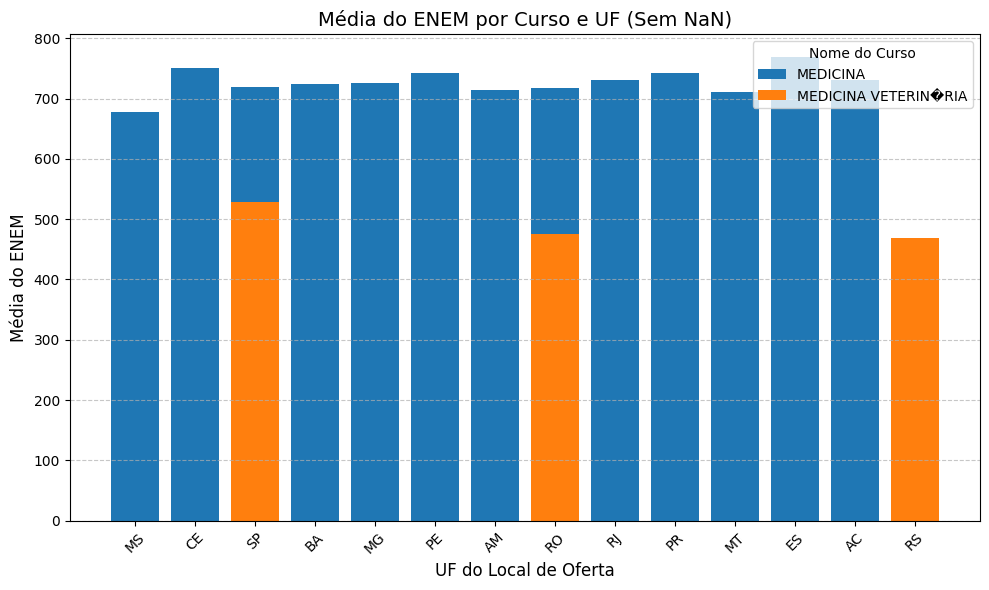

In [81]:
# Converter o DataFrame Pandas on Spark para Pandas tradicional
cursos_ordenados_sem_nan_pd = cursos_ordenados_sem_nan.to_pandas()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))

for curso in cursos_ordenados_sem_nan_pd['nome_do_curso'].unique():
    subset = cursos_ordenados_sem_nan_pd[cursos_ordenados_sem_nan_pd['nome_do_curso'] == curso]
    plt.bar(subset['uf_do_local_de_oferta'], subset['media_nota_enem'], label=curso)

plt.title("Média do ENEM por Curso e UF (Sem NaN)", fontsize=14)
plt.xlabel("UF do Local de Oferta", fontsize=12)
plt.ylabel("Média do ENEM", fontsize=12)
plt.legend(title="Nome do Curso")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [82]:
cursos_ordenados = ps.sql('''
SELECT
    AVG(mdia_nota_enem) AS media_nota_enem,
    nome_do_curso,
    turno,
    uf_do_local_de_oferta, ano_do_processo_seletivo
FROM {DF}
WHERE turno = 'INTEGRAL'
  AND nome_do_curso LIKE '%MEDICINA%'
GROUP BY nome_do_curso, turno, uf_do_local_de_oferta, ano_do_processo_seletivo
order by ano_do_processo_seletivo
''', DF=df)

display(cursos_ordenados)


media_nota_enem         nome_do_curso     turno uf_do_local_de_oferta  ano_do_processo_seletivo
0        751.000000              MEDICINA  INTEGRAL                    CE                      2021
1        731.500000              MEDICINA  INTEGRAL                    RJ                      2021
2               NaN              MEDICINA  INTEGRAL                    SC                      2021
3               NaN           BIOMEDICINA  INTEGRAL                    RS                      2021
4               NaN  MEDICINA VETERIN�RIA  INTEGRAL                    DF                      2021
5               NaN  MEDICINA VETERIN�RIA  INTEGRAL                    RJ                      2021
6               NaN              MEDICINA  INTEGRAL                    RS                      2021
7        528.000000  MEDICINA VETERIN�RIA  INTEGRAL                    SP                      2021
8        468.000000  MEDICINA VETERIN�RIA  INTEGRAL                    RS                      2021
9        723.750000              MEDICINA  INTEGRAL                    BA                      2021
10       741.500000              MEDICINA  INTEGRAL                    PR                      2021
11              NaN  MEDICINA VETERIN�RIA  INTEGRAL                    PR                      2021
12              NaN  MEDICINA VETERIN�RIA  INTEGRAL                    MS                      2021
13              NaN              MEDICINA  INTEGRAL                    GO                      2021
14              NaN  MEDICINA VETERIN�RIA  INTEGRAL                    MG                      2021
15              NaN              MEDICINA  INTEGRAL                    DF                      2021
16              NaN              MEDICINA  INTEGRAL                    SE                      2021
17       475.000000  MEDICINA VETERIN�RIA  INTEGRAL                    RO                      2021
18              NaN              MEDICINA  INTEGRAL                    AL                      2021
19       726.142857              MEDICINA  INTEGRAL                    MG                      2021
20       714.000000              MEDICINA  INTEGRAL                    AM                      2021
21       743.000000              MEDICINA  INTEGRAL                    PE                      2021
22       711.000000              MEDICINA  INTEGRAL                    MT                      2021
23              NaN  MEDICINA VETERIN�RIA  INTEGRAL                    AM                      2021
24       768.000000              MEDICINA  INTEGRAL                    ES                      2021
25       677.000000              MEDICINA  INTEGRAL                    MS                      2021
26              NaN           BIOMEDICINA  INTEGRAL                    SP                      2021
27              NaN  MEDICINA VETERIN�RIA  INTEGRAL                    ES                      2021
28       718.500000              MEDICINA  INTEGRAL                    SP                      2021
29              NaN              MEDICINA  INTEGRAL                    RN                      2021
30              NaN              MEDICINA  INTEGRAL                    MA                      2021
31              NaN              MEDICINA  INTEGRAL                    PA                      2021
32       717.500000              MEDICINA  INTEGRAL                    RO                      2021
33              NaN  MEDICINA VETERIN�RIA  INTEGRAL                    CE                      2021
34              NaN  MEDICINA VETERIN�RIA  INTEGRAL                    TO                      2021
35              NaN              MEDICINA  INTEGRAL                    PB                      2021
36              NaN  MEDICINA VETERIN�RIA  INTEGRAL                    SC                      2021
37       730.000000              MEDICINA  INTEGRAL                    AC                      2021
38              NaN              MEDICINA  INTEGRAL                    TO                      2021
39  

In [83]:
# Remove linhas onde 'media_nota_enem' é NaN
cursos_ordenados_sem_nan = cursos_ordenados.dropna(subset=["media_nota_enem"])

# Exibe o resultado
display(cursos_ordenados_sem_nan)

media_nota_enem         nome_do_curso     turno uf_do_local_de_oferta  ano_do_processo_seletivo
0        751.000000              MEDICINA  INTEGRAL                    CE                      2021
1        731.500000              MEDICINA  INTEGRAL                    RJ                      2021
7        528.000000  MEDICINA VETERIN�RIA  INTEGRAL                    SP                      2021
8        468.000000  MEDICINA VETERIN�RIA  INTEGRAL                    RS                      2021
9        723.750000              MEDICINA  INTEGRAL                    BA                      2021
10       741.500000              MEDICINA  INTEGRAL                    PR                      2021
17       475.000000  MEDICINA VETERIN�RIA  INTEGRAL                    RO                      2021
19       726.142857              MEDICINA  INTEGRAL                    MG                      2021
20       714.000000              MEDICINA  INTEGRAL                    AM                      2021
21       743.000000              MEDICINA  INTEGRAL                    PE                      2021
22       711.000000              MEDICINA  INTEGRAL                    MT                      2021
24       768.000000              MEDICINA  INTEGRAL                    ES                      2021
25       677.000000              MEDICINA  INTEGRAL                    MS                      2021
28       718.500000              MEDICINA  INTEGRAL                    SP                      2021
32       717.500000              MEDICINA  INTEGRAL                    RO                      2021
37       730.000000              MEDICINA  INTEGRAL                    AC                      2021

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning:

`to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.



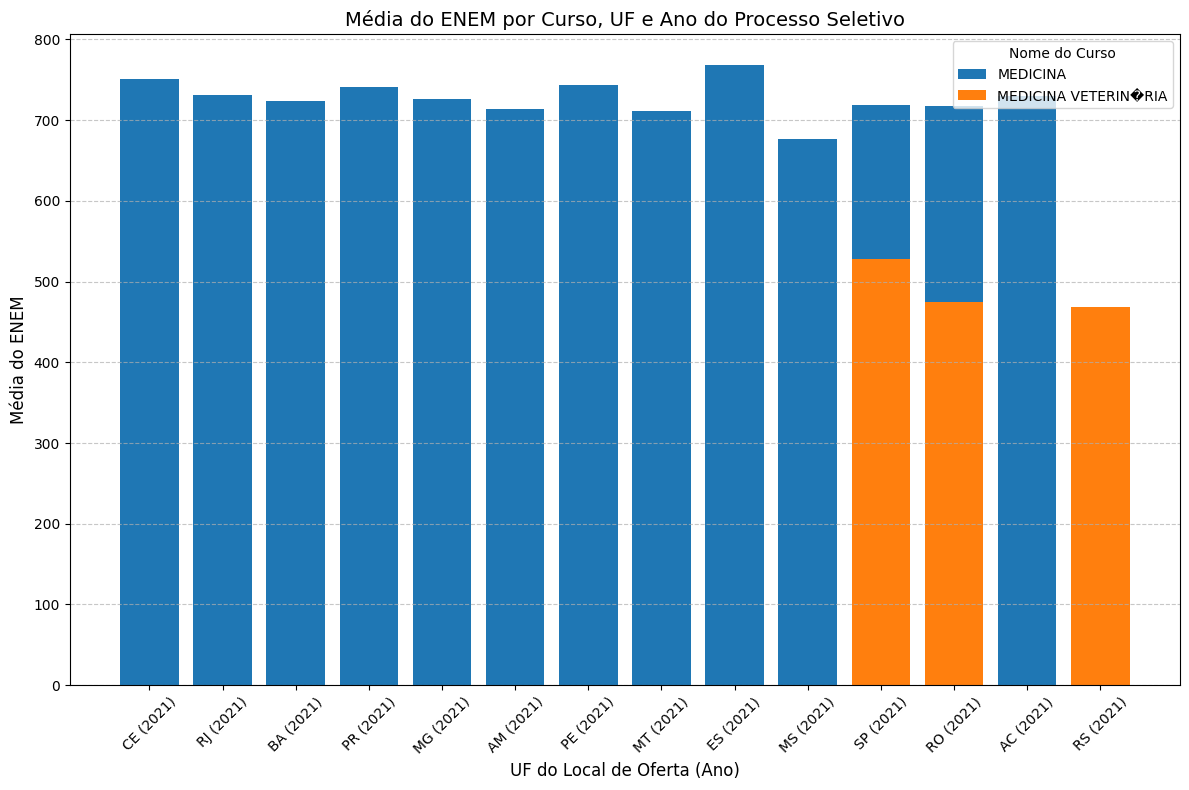

In [84]:
# Converter o DataFrame Pandas on Spark para Pandas tradicional
cursos_ordenados_sem_nan_pd = cursos_ordenados_sem_nan.to_pandas()

# Verificar se a coluna 'ano_do_processo_seletivo' existe
if 'ano_do_processo_seletivo' in cursos_ordenados_sem_nan_pd.columns:
    # Criar o gráfico de barras
    plt.figure(figsize=(12, 8))

    # Agrupar e plotar os dados por curso
    for curso in cursos_ordenados_sem_nan_pd['nome_do_curso'].unique():
        subset = cursos_ordenados_sem_nan_pd[cursos_ordenados_sem_nan_pd['nome_do_curso'] == curso]
        plt.bar(
            subset['uf_do_local_de_oferta'] + " (" + subset['ano_do_processo_seletivo'].astype(str) + ")",
            subset['media_nota_enem'],
            label=curso
        )

    # Configurar o gráfico
    plt.title("Média do ENEM por Curso, UF e Ano do Processo Seletivo", fontsize=14)
    plt.xlabel("UF do Local de Oferta (Ano)", fontsize=12)
    plt.ylabel("Média do ENEM", fontsize=12)
    plt.legend(title="Nome do Curso")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Exibir o gráfico
    plt.show()
else:
    print("O dataset não contém a coluna 'ano_do_processo_seletivo'. Por favor, verifique os dados.")


In [85]:
import plotly.express as px
# Criar o gráfico interativo com Plotly
fig = px.bar(
    cursos_ordenados_sem_nan_pd,
    x="uf_do_local_de_oferta",
    y="media_nota_enem",
    color="nome_do_curso",
    text="ano_do_processo_seletivo",
    title="Média do ENEM por Curso, UF e Ano do Processo Seletivo",
    labels={
        "uf_do_local_de_oferta": "UF do Local de Oferta",
        "media_nota_enem": "Média do ENEM",
        "nome_do_curso": "Nome do Curso",
        "ano_do_processo_seletivo": "Ano do Processo Seletivo"
    },
    hover_data=["ano_do_processo_seletivo"]
)

# Configurar o layout do gráfico
fig.update_layout(
    xaxis_title="UF do Local de Oferta",
    yaxis_title="Média do ENEM",
    legend_title="Curso",
    xaxis_tickangle=45,
    template="plotly_white"
)

# Exibir o gráfico
fig.show()

In [86]:
df_medicina = ps.sql('''
SELECT
*
FROM {DF}
WHERE
  nome_do_curso LIKE '%MEDICINA%'

order by ano_do_processo_seletivo
''', DF=df)

display(df_medicina)

ano_do_processo_seletivo  semestre_do_processo_seletivo sexo data_de_nascimento uf_de_residncia       municipio_de_residncia  etniacor pessoa_com_deficincia tipo_de_escola_no_ensino_mdio  ano_concluso_ensino_mdio concluiu_curso_superior professor_rede_pblica_ensino  n_de_membros_grupo_familiar renda_familiar_mensal_bruta renda_mensal_bruta_per_capita regio_grupo_de_preferncia                 uf  codmicrorregio            microrregio  codmesorregio                        mesorregio conceito_de_curso_do_gp      rea_do_conhecimento                                                       subrea_do_conhecimento  cod_do_grupo_de_preferncia nota_corte_grupo_preferncia  opes_de_cursos_da_inscrio                                            nome_mantenedora                                                                natureza_jurdica_mantenedora  cnpj_da_mantenedora  cdigo_emec_da_mantenedora                                                    nome_da_ies  cdigo_emec_da_ies organizao_acadmica_da_ies           municpio_da_ies uf_da_ies                                          nome_do_local_de_oferta  cdigo_do_local_de_oferta muncipio_do_local_de_oferta uf_do_local_de_oferta  cdigo_do_curso         nome_do_curso       turno       grau    conceito mdia_nota_enem  ano_do_enem  redao matemtica_e_suas_tecnologias linguagens_cdigos_e_suas_tec cincias_natureza_e_suas_tec cincias_humanas_e_suas_tec situao_inscrio_fies percentual_de_financiamento semestre_do_financiamento  qtde_semestre_financiado
0                        2021                              1    F           13/05/00              MA           S�O JO�O DOS PATOS    BRANCA                   N�O                           N�O                      2017                     N�O                          N�O                            2                     4394,93                       1464,98                       SUL             PARAN�           41037               CURITIBA           4110         METROPOLITANA DE CURITIBA                       4  CURSOS DA AREA DE SAUDE                                                                     MEDICINA                      121289                         763                          1                      ASSOCIACAO PARANAENSE DE CULTURA - APC  PESSOA JUR�DICA DE DIREITO PRIVADO - SEM FINS LUCRATIVOS - ASSOCIA��O DE UTILIDADE P�BLICA       76659820000151                         10                     PONTIF�CIA UNIVERSIDADE CAT�LICA DO PARAN�                 10              UNIVERSIDADE                  CURITIBA        PR                                          PUCPR - CAMPUS CURITIBA                    657676                    CURITIBA                    PR             868              MEDICINA    INTEGRAL  SEMESTRAL           4          766,4         2018    980                        769,3                        691,3                       673,3                      718,1          CONTRATADA                       75,38                        1�                        12
1                        2021                              1    F           19/06/96              MT             TANGAR� DA SERRA   AMARELA                   N�O                           N�O                      2013                     N�O                          N�O                            4                     6694,99                          1339                       SUL             PARAN�           41037               CURITIBA           4110         METROPOLITANA DE CURITIBA                       4  CURSOS DA AREA DE SAUDE                                                                     MEDICINA                      121289                         763                          1                      ASSOCIACAO PARANAENSE DE CULTURA - APC  PESSOA JUR�DICA DE DIREITO PRIVADO - SEM FINS LUCRATIVOS - ASSOCIA��O DE UTILIDADE P�BLICA       76659820000151                         10                     PONTIF�CIA UNIVERSIDADE CAT�LICA DO PARAN�                 10            

In [88]:
df_medicina.to_parquet('/FileStore/tables/medicina.parquet')

In [89]:
df_medicina['microrregio'].unique()

0                          MEIA PONTE
1                      RIO DE JANEIRO
2                        POUSO ALEGRE
3                             MAR�LIA
4                              CARIRI
5                     MOGI DAS CRUZES
6                         PATO BRANCO
7                 BA�A DA ILHA GRANDE
8                          PIRACICABA
9                       TE�FILO OTONI
10                            ARACAJU
11               VIT�RIA DA CONQUISTA
12                           JUAZEIRO
13                   FEIRA DE SANTANA
14                              JALES
15                         UBERL�NDIA
16                           EST�NCIA
17                           IPATINGA
18                              BEL�M
19                             CUIAB�
20                         ALAGOINHAS
21                          GUARULHOS
22                             OS�RIO
23                            ITAPEVA
24                             RECIFE
25                           LONDRINA
26          

In [90]:
nomes_cidades = {
    "RIO DE JANEIRO": "Capital",
    "POUSO ALEGRE": "Município",
    "BAÍA DA ILHA GRANDE": "Município",
    "PIRACICABA": "Município",
    "TEÓFILO OTONI": "Município",
    "ARACAJU": "Capital",
    "FEIRA DE SANTANA": "Município",
    "UBERLÂNDIA": "Município",
    "ESTÂNCIA": "Município",
    "IPATINGA": "Município",
    "ALAGOINHAS": "Município",
    "GUARULHOS": "Município",
    "RECIFE": "Capital",
    "LONDRINA": "Município",
    "TOLEDO": "Município",
    "CAMPOS DOS GOYTACAZES": "Município",
    "ITAPERUNA": "Município",
    "OSASCO": "Município",
    "CAXIAS DO SUL": "Município",
    "SANTOS": "Município",
    "SOROCABA": "Município",
    "CAMPANHA OCIDENTAL": "Município",
    "FORMIGA": "Município",
    "BAURU": "Município",
    "CURITIBA": "Capital",
    "BELO HORIZONTE": "Capital",
    "RIBEIRÃO PRETO": "Município",
    "SÃO PAULO": "Capital",
    "JOINVILLE": "Município",
    "BRASÍLIA": "Capital",
    "PATROCÍNIO": "Município",
    "PRESIDENTE PRUDENTE": "Município",
    "JOÃO PESSOA": "Capital",
    "VALE DO IPOJUCA": "Município",
    "SÃO JOÃO DA BOA VISTA": "Município",
    "SANTA CRUZ DO SUL": "Município",
    "PORTO NACIONAL": "Município",
    "VOTUPORANGA": "Município",
    "CERES": "Município",
    "ARAÇATUBA": "Município",
    "MACEIÓ": "Capital",
    "JAÚ": "Município",
    "ITAJUBÁ": "Município",
    "OURINHOS": "Município",
    "SÃO JOSÉ DOS CAMPOS": "Município",
    "VARGINHA": "Município",
    "ANÁPOLIS": "Município",
    "BARBACENA": "Município",
    "VITÓRIA": "Capital",
    "DIVINÓPOLIS": "Município",
    "JUIZ DE FORA": "Município",
    "SETE LAGOAS": "Município",
    "ALFENAS": "Município",
    "MOJI MIRIM": "Município",
    "CAMPANHA MERIDIONAL": "Município",
    "CONSELHEIRO LAFAIETE": "Município",
    "SALVADOR": "Capital",
    "ARARAQUARA": "Município",
    "UBERABA": "Município",
    "MEIA PONTE": "Município",
    "MARÍLIA": "Município",
    "CARIRI": "Município",
    "MOGI DAS CRUZES": "Município",
    "JUAZEIRO": "Município",
    "JALES": "Município",
    "CUIABÁ": "Capital",
    "OSÓRIO": "Município",
    "DRACENA": "Município",
    "VALE DO PARAÍBA FLUMINENSE": "Município",
    "FREDERICO WESTPHALEN": "Município",
    "ASSIS": "Município",
    "BAIXO PANTANAL": "Município",
    "CASCAVEL": "Município",
    "FRANCA": "Município",
    "FORTALEZA": "Capital",
    "MANAUS": "Capital",
    "CAMPO GRANDE": "Capital",
    "MARINGÁ": "Município",
    "PONTA GROSSA": "Município",
    "SÃO CARLOS": "Município",
    "SÃO JOSÉ DO RIO PRETO": "Município",
    "SERRANA": "Município",
    "CARATINGA": "Município",
    "ITUVERAVA": "Município",
    "NATAL": "Capital",
    "PORTO ALEGRE": "Capital",
    "VILHENA": "Município",
    "FLORIANÓPOLIS": "Capital",
    "CRUZ ALTA": "Município",
    "SANTIAGO": "Município",
    "GOVERNADOR VALADARES": "Município",
    "GOIÂNIA": "Capital",
    "DOURADOS": "Município",
    "BRAGANÇA PAULISTA": "Município",
    "TRÊS LAGOAS": "Município",
    "SANTO ÂNGELO": "Município",
    "UMUARAMA": "Município",
    "MÉDIO ARAGUAIA": "Município"
}


In [91]:
nomes_cidades

{'RIO DE JANEIRO': 'Capital',
 'POUSO ALEGRE': 'Município',
 'BAÍA DA ILHA GRANDE': 'Município',
 'PIRACICABA': 'Município',
 'TEÓFILO OTONI': 'Município',
 'ARACAJU': 'Capital',
 'FEIRA DE SANTANA': 'Município',
 'UBERLÂNDIA': 'Município',
 'ESTÂNCIA': 'Município',
 'IPATINGA': 'Município',
 'ALAGOINHAS': 'Município',
 'GUARULHOS': 'Município',
 'RECIFE': 'Capital',
 'LONDRINA': 'Município',
 'TOLEDO': 'Município',
 'CAMPOS DOS GOYTACAZES': 'Município',
 'ITAPERUNA': 'Município',
 'OSASCO': 'Município',
 'CAXIAS DO SUL': 'Município',
 'SANTOS': 'Município',
 'SOROCABA': 'Município',
 'CAMPANHA OCIDENTAL': 'Município',
 'FORMIGA': 'Município',
 'BAURU': 'Município',
 'CURITIBA': 'Capital',
 'BELO HORIZONTE': 'Capital',
 'RIBEIRÃO PRETO': 'Município',
 'SÃO PAULO': 'Capital',
 'JOINVILLE': 'Município',
 'BRASÍLIA': 'Capital',
 'PATROCÍNIO': 'Município',
 'PRESIDENTE PRUDENTE': 'Município',
 'JOÃO PESSOA': 'Capital',
 'VALE DO IPOJUCA': 'Município',
 'SÃO JOÃO DA BOA VISTA': 'Município',

In [92]:
capitais = df_medicina['microrregio'].map(nomes_cidades)

In [93]:
df_medicina.insert(loc=19,column= "tipo_cidade",value=capitais)

In [94]:
df_medicina.head()

ano_do_processo_seletivo  semestre_do_processo_seletivo sexo data_de_nascimento uf_de_residncia municipio_de_residncia etniacor pessoa_com_deficincia tipo_de_escola_no_ensino_mdio  ano_concluso_ensino_mdio concluiu_curso_superior professor_rede_pblica_ensino  n_de_membros_grupo_familiar renda_familiar_mensal_bruta renda_mensal_bruta_per_capita regio_grupo_de_preferncia      uf  codmicrorregio microrregio tipo_cidade  codmesorregio                 mesorregio conceito_de_curso_do_gp      rea_do_conhecimento subrea_do_conhecimento  cod_do_grupo_de_preferncia nota_corte_grupo_preferncia  opes_de_cursos_da_inscrio                        nome_mantenedora                                                                natureza_jurdica_mantenedora  cnpj_da_mantenedora  cdigo_emec_da_mantenedora                                 nome_da_ies  cdigo_emec_da_ies organizao_acadmica_da_ies municpio_da_ies uf_da_ies  nome_do_local_de_oferta  cdigo_do_local_de_oferta muncipio_do_local_de_oferta uf_do_local_de_oferta  cdigo_do_curso nome_do_curso     turno       grau conceito mdia_nota_enem  ano_do_enem  redao matemtica_e_suas_tecnologias linguagens_cdigos_e_suas_tec cincias_natureza_e_suas_tec cincias_humanas_e_suas_tec situao_inscrio_fies percentual_de_financiamento semestre_do_financiamento  qtde_semestre_financiado
0                      2021                              1    F           13/05/00              MA     S�O JO�O DOS PATOS   BRANCA                   N�O                           N�O                      2017                     N�O                          N�O                            2                     4394,93                       1464,98                       SUL  PARAN�           41037    CURITIBA     Capital           4110  METROPOLITANA DE CURITIBA                       4  CURSOS DA AREA DE SAUDE               MEDICINA                      121289                         763                          1  ASSOCIACAO PARANAENSE DE CULTURA - APC  PESSOA JUR�DICA DE DIREITO PRIVADO - SEM FINS LUCRATIVOS - ASSOCIA��O DE UTILIDADE P�BLICA       76659820000151                         10  PONTIF�CIA UNIVERSIDADE CAT�LICA DO PARAN�                 10              UNIVERSIDADE        CURITIBA        PR  PUCPR - CAMPUS CURITIBA                    657676                    CURITIBA                    PR             868      MEDICINA  INTEGRAL  SEMESTRAL        4          766,4         2018    980                        769,3                        691,3                       673,3                      718,1          CONTRATADA                       75,38                        1�                        12
1                      2021                              1    F           19/06/96              MT       TANGAR� DA SERRA  AMARELA                   N�O                           N�O                      2013                     N�O                          N�O                            4                     6694,99                          1339                       SUL  PARAN�           41037    CURITIBA     Capital           4110  METROPOLITANA DE CURITIBA                       4  CURSOS DA AREA DE SAUDE               MEDICINA                      121289                         763                          1  ASSOCIACAO PARANAENSE DE CULTURA - APC  PESSOA JUR�DICA DE DIREITO PRIVADO - SEM FINS LUCRATIVOS - ASSOCIA��O DE UTILIDADE P�BLICA       76659820000151                         10  PONTIF�CIA UNIVERSIDADE CAT�LICA DO PARAN�                 10              UNIVERSIDADE        CURITIBA        PR  PUCPR - CAMPUS CURITIBA                    657676                    CURITIBA                    PR             868      MEDICINA  INTEGRAL  SEMESTRAL        4          762,4         2020    940                        827,2                        651,8                       676,8                      716,2          CONTRATADA                       75,38                        1�                        12
2                      2021    

In [95]:
semestres_financiados = ps.sql('''
SELECT
    tipo_cidade,
    SUM(qtde_semestre_financiado) AS total_semestres_financiados
FROM {DF}
GROUP BY tipo_cidade
ORDER BY total_semestres_financiados DESC
''', DF=df_medicina)

display(semestres_financiados)


tipo_cidade  total_semestres_financiados
0        None                        19908
1   Município                         8519
2     Capital                         8212

In [39]:
print(df_medicina.columns)


Index(['ano_do_processo_seletivo', 'semestre_do_processo_seletivo', 'sexo',
       'data_de_nascimento', 'uf_de_residncia', 'municipio_de_residncia',
       'etniacor', 'pessoa_com_deficincia', 'tipo_de_escola_no_ensino_mdio',
       'ano_concluso_ensino_mdio', 'concluiu_curso_superior',
       'professor_rede_pblica_ensino', 'n_de_membros_grupo_familiar',
       'renda_familiar_mensal_bruta', 'renda_mensal_bruta_per_capita',
       'regio_grupo_de_preferncia', 'uf', 'codmicrorregio', 'microrregio',
       'tipo_cidade', 'codmesorregio', 'mesorregio', 'conceito_de_curso_do_gp',
       'rea_do_conhecimento', 'subrea_do_conhecimento',
       'cod_do_grupo_de_preferncia', 'nota_corte_grupo_preferncia',
       'opes_de_cursos_da_inscrio', 'nome_mantenedora',
       'natureza_jurdica_mantenedora', 'cnpj_da_mantenedora',
       'cdigo_emec_da_mantenedora', 'nome_da_ies', 'cdigo_emec_da_ies',
       'organizao_acadmica_da_ies', 'municpio_da_ies', 'uf_da_ies',
       'nome_do_local_de_oferta',

In [96]:

# Converter para Pandas tradicional
semestres_financiados_pd = semestres_financiados.to_pandas()

# Criar o gráfico interativo com Plotly
import plotly.express as px

fig = px.bar(
    semestres_financiados_pd,
    x="tipo_cidade",
    y="total_semestres_financiados",
    title="Total de Semestres Financiados por Tipo de Cidade",
    labels={
        "tipo_cidade": "Tipo de Cidade",
        "total_semestres_financiados": "Total de Semestres Financiados"
    },
    color="tipo_cidade",  # Adiciona cores para cada tipo de cidade
    text="total_semestres_financiados"  # Exibe o valor na barra
)

# Ajustar o layout do gráfico
fig.update_layout(
    xaxis_title="Tipo de Cidade",
    yaxis_title="Total de Semestres Financiados",
    template="plotly_white"
)

# Exibir o gráfico
fig.show()


/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning:

`to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.



In [43]:
df_medicina.columns

Index(['ano_do_processo_seletivo', 'semestre_do_processo_seletivo', 'sexo',
       'data_de_nascimento', 'uf_de_residncia', 'municipio_de_residncia',
       'etniacor', 'pessoa_com_deficincia', 'tipo_de_escola_no_ensino_mdio',
       'ano_concluso_ensino_mdio', 'concluiu_curso_superior',
       'professor_rede_pblica_ensino', 'n_de_membros_grupo_familiar',
       'renda_familiar_mensal_bruta', 'renda_mensal_bruta_per_capita',
       'regio_grupo_de_preferncia', 'uf', 'codmicrorregio', 'microrregio',
       'tipo_cidade', 'codmesorregio', 'mesorregio', 'conceito_de_curso_do_gp',
       'rea_do_conhecimento', 'subrea_do_conhecimento',
       'cod_do_grupo_de_preferncia', 'nota_corte_grupo_preferncia',
       'opes_de_cursos_da_inscrio', 'nome_mantenedora',
       'natureza_jurdica_mantenedora', 'cnpj_da_mantenedora',
       'cdigo_emec_da_mantenedora', 'nome_da_ies', 'cdigo_emec_da_ies',
       'organizao_acadmica_da_ies', 'municpio_da_ies', 'uf_da_ies',
       'nome_do_local_de_oferta',

In [45]:
df_medicina.head(1)

ano_do_processo_seletivo  semestre_do_processo_seletivo sexo data_de_nascimento uf_de_residncia municipio_de_residncia etniacor pessoa_com_deficincia tipo_de_escola_no_ensino_mdio  ano_concluso_ensino_mdio concluiu_curso_superior professor_rede_pblica_ensino  n_de_membros_grupo_familiar renda_familiar_mensal_bruta renda_mensal_bruta_per_capita regio_grupo_de_preferncia      uf  codmicrorregio microrregio tipo_cidade  codmesorregio                 mesorregio conceito_de_curso_do_gp      rea_do_conhecimento subrea_do_conhecimento  cod_do_grupo_de_preferncia nota_corte_grupo_preferncia  opes_de_cursos_da_inscrio                        nome_mantenedora                                                                natureza_jurdica_mantenedora  cnpj_da_mantenedora  cdigo_emec_da_mantenedora                                 nome_da_ies  cdigo_emec_da_ies organizao_acadmica_da_ies municpio_da_ies uf_da_ies  nome_do_local_de_oferta  cdigo_do_local_de_oferta muncipio_do_local_de_oferta uf_do_local_de_oferta  cdigo_do_curso nome_do_curso     turno       grau conceito mdia_nota_enem  ano_do_enem  redao matemtica_e_suas_tecnologias linguagens_cdigos_e_suas_tec cincias_natureza_e_suas_tec cincias_humanas_e_suas_tec situao_inscrio_fies percentual_de_financiamento semestre_do_financiamento  qtde_semestre_financiado
0                      2021                              1    F           13/05/00              MA     S�O JO�O DOS PATOS   BRANCA                   N�O                           N�O                      2017                     N�O                          N�O                            2                     4394,93                       1464,98                       SUL  PARAN�           41037    CURITIBA     Capital           4110  METROPOLITANA DE CURITIBA                       4  CURSOS DA AREA DE SAUDE               MEDICINA                      121289                         763                          1  ASSOCIACAO PARANAENSE DE CULTURA - APC  PESSOA JUR�DICA DE DIREITO PRIVADO - SEM FINS LUCRATIVOS - ASSOCIA��O DE UTILIDADE P�BLICA       76659820000151                         10  PONTIF�CIA UNIVERSIDADE CAT�LICA DO PARAN�                 10              UNIVERSIDADE        CURITIBA        PR  PUCPR - CAMPUS CURITIBA                    657676                    CURITIBA                    PR             868      MEDICINA  INTEGRAL  SEMESTRAL        4          766,4         2018    980                        769,3                        691,3                       673,3                      718,1          CONTRATADA                       75,38                        1�                        12

In [97]:
aux = df_medicina[[ 'percentual_de_financiamento',

             'renda_familiar_mensal_bruta', 'renda_mensal_bruta_per_capita', 'mdia_nota_enem']]

In [98]:
df_medicina.columns

Index(['ano_do_processo_seletivo', 'semestre_do_processo_seletivo', 'sexo',
       'data_de_nascimento', 'uf_de_residncia', 'municipio_de_residncia',
       'etniacor', 'pessoa_com_deficincia', 'tipo_de_escola_no_ensino_mdio',
       'ano_concluso_ensino_mdio', 'concluiu_curso_superior',
       'professor_rede_pblica_ensino', 'n_de_membros_grupo_familiar',
       'renda_familiar_mensal_bruta', 'renda_mensal_bruta_per_capita',
       'regio_grupo_de_preferncia', 'uf', 'codmicrorregio', 'microrregio',
       'tipo_cidade', 'codmesorregio', 'mesorregio', 'conceito_de_curso_do_gp',
       'rea_do_conhecimento', 'subrea_do_conhecimento',
       'cod_do_grupo_de_preferncia', 'nota_corte_grupo_preferncia',
       'opes_de_cursos_da_inscrio', 'nome_mantenedora',
       'natureza_jurdica_mantenedora', 'cnpj_da_mantenedora',
       'cdigo_emec_da_mantenedora', 'nome_da_ies', 'cdigo_emec_da_ies',
       'organizao_acadmica_da_ies', 'municpio_da_ies', 'uf_da_ies',
       'nome_do_local_de_oferta',

In [99]:
df_medicina.corr()

ano_do_processo_seletivo  semestre_do_processo_seletivo  ano_concluso_ensino_mdio  n_de_membros_grupo_familiar  codmicrorregio  codmesorregio  cod_do_grupo_de_preferncia  opes_de_cursos_da_inscrio  cnpj_da_mantenedora  cdigo_emec_da_mantenedora  cdigo_emec_da_ies  cdigo_do_local_de_oferta  cdigo_do_curso  ano_do_enem     redao  qtde_semestre_financiado
ano_do_processo_seletivo                            NaN                            NaN                       NaN                          NaN             NaN            NaN                         NaN                        NaN                  NaN                        NaN                NaN                       NaN             NaN          NaN       NaN                       NaN
semestre_do_processo_seletivo                       NaN                            NaN                       NaN                          NaN             NaN            NaN                         NaN                        NaN                  NaN                        NaN                NaN                       NaN             NaN          NaN       NaN                       NaN
ano_concluso_ensino_mdio                            NaN                            NaN                  1.000000                     0.082836        0.018548       0.018355                    0.002980                   0.000352             0.001816                  -0.002411          -0.005722                 -0.038553       -0.028002     0.433591 -0.016409                  0.016666
n_de_membros_grupo_familiar                         NaN                            NaN                  0.082836                     1.000000       -0.069350      -0.069457                   -0.086148                   0.015585            -0.070544                   0.019234           0.051398                  0.026360       -0.009052     0.091723  0.098914                  0.069253
codmicrorregio                                      NaN                            NaN                  0.018548                    -0.069350        1.000000       0.999996                    0.958811                   0.012505             0.303055                   0.029801          -0.114000                 -0.117427        0.023545     0.025367 -0.003631                  0.030673
codmesorregio                                       NaN                            NaN                  0.018355                    -0.069457        0.999996       1.000000                    0.959411                   0.012568             0.303876                   0.029161          -0.114505                 -0.117146        0.023132     0.025387 -0.003312                  0.031007
cod_do_grupo_de_preferncia                          NaN                            NaN                  0.002980                    -0.086148        0.958811       0.959411                    1.000000                   0.001997             0.429648                  -0.057495          -0.190885                 -0.089033       -0.016086     0.022828  0.005175                  0.042291
opes_de_cursos_da_inscrio                           NaN                            NaN                  0.000352                     0.015585        0.012505       0.012568                    0.001997                   1.000000            -0.012722                  -0.020453          -0.030823                 -0.036968        0.031348     0.048374  0.130934                  0.132224
cnpj_da_mantenedora                                 NaN                            NaN                  0.001816                    -0.070544        0.303055       0.303876                    0.429648                  -0.012722             1.000000                  -0.162387          -0.230297                  0.014223       -0.051656     0.022131  0.038933                  0.036817
cdigo_emec_da_mantenedora                           NaN                            NaN                 -0.002411                     0.019234        0.029801       0.02916

In [49]:
aux.head(1)

percentual_de_financiamento renda_familiar_mensal_bruta renda_mensal_bruta_per_capita mdia_nota_enem
0                       75,38                     4394,93                       1464,98          766,4

In [100]:
import pandas as pd

# Selecionar as colunas relevantes
aux = df_medicina[['percentual_de_financiamento', 'renda_familiar_mensal_bruta',
                   'renda_mensal_bruta_per_capita', 'mdia_nota_enem']]

# Substituir vírgulas por pontos e converter para float
aux = aux.apply(lambda col: col.str.replace(',', '.')).astype(float)

# Calcular a correlação e aplicar o estilo
corr_matrix = aux.corr()
styled_corr = corr_matrix.style.background_gradient(cmap='coolwarm')

# Exibir a matriz de correlação estilizada
styled_corr


/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning:

If the type hints is not specified for `apply`, it is expensive to infer the data type internally.



In [51]:
df_medicina.plot.scatter(x='renda_mensal_bruta_per_capita',y='mdia_nota_enem' )

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning:

`to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning:

`to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.



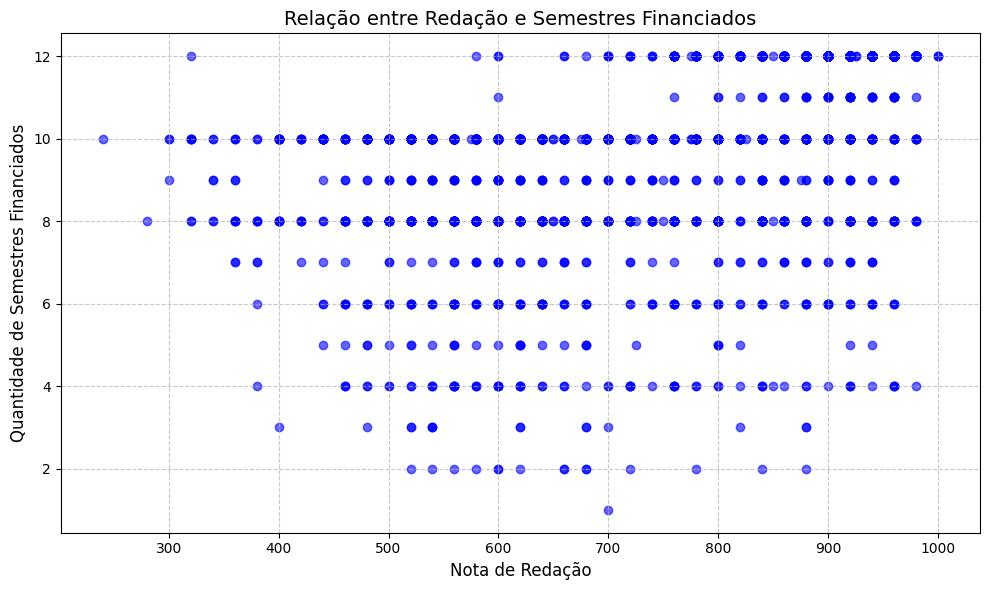

In [52]:
import matplotlib.pyplot as plt

# Converter as colunas para NumPy arrays
redao_values = df_medicina['redao'].to_numpy()
qtde_semestre_values = df_medicina['qtde_semestre_financiado'].to_numpy()

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(redao_values, qtde_semestre_values, color='blue', alpha=0.6)

# Configurar rótulos e título
plt.title("Relação entre Redação e Semestres Financiados", fontsize=14)
plt.xlabel("Nota de Redação", fontsize=12)
plt.ylabel("Quantidade de Semestres Financiados", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning:

`to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.



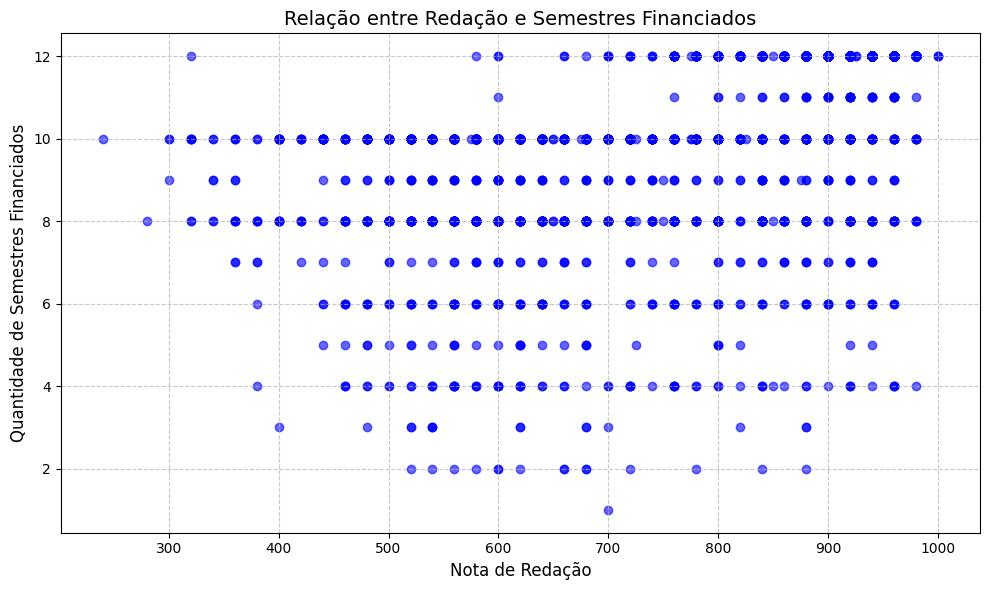

In [53]:
import matplotlib.pyplot as plt

# Converter o DataFrame inteiro para Pandas tradicional
df_medicina_pd = df_medicina.to_pandas()

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df_medicina_pd['redao'], df_medicina_pd['qtde_semestre_financiado'], color='blue', alpha=0.6)

# Configurar rótulos e título
plt.title("Relação entre Redação e Semestres Financiados", fontsize=14)
plt.xlabel("Nota de Redação", fontsize=12)
plt.ylabel("Quantidade de Semestres Financiados", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [54]:
import plotly.express as px

# Converter o DataFrame do Pandas on Spark para Pandas tradicional
df_medicina_pd = df_medicina.to_pandas()

# Criar o gráfico de dispersão com Plotly
fig = px.scatter(
    df_medicina_pd,
    x="redao",
    y="qtde_semestre_financiado",
    title="Relação entre Redação e Semestres Financiados",
    labels={
        "redao": "Nota de Redação",
        "qtde_semestre_financiado": "Quantidade de Semestres Financiados"
    },
    color="redao",  # Adicionar uma escala de cores baseada na nota de redação
    size="qtde_semestre_financiado",  # Escala de tamanho baseada nos semestres financiados
    hover_data=["redao", "qtde_semestre_financiado"]  # Exibir detalhes ao passar o mouse
)

# Ajustar layout
fig.update_layout(
    template="plotly_white",
    xaxis_title="Nota de Redação",
    yaxis_title="Quantidade de Semestres Financiados"
)

# Exibir o gráfico
fig.show()


In [55]:
df_medicina['qtde_semestre_financiado'].plot.box()

In [56]:
df['qtde_semestre_financiado'].plot.box()

In [57]:
df.columns

Index(['ano_do_processo_seletivo', 'semestre_do_processo_seletivo', 'sexo',
       'data_de_nascimento', 'uf_de_residncia', 'municipio_de_residncia',
       'etniacor', 'pessoa_com_deficincia', 'tipo_de_escola_no_ensino_mdio',
       'ano_concluso_ensino_mdio', 'concluiu_curso_superior',
       'professor_rede_pblica_ensino', 'n_de_membros_grupo_familiar',
       'renda_familiar_mensal_bruta', 'renda_mensal_bruta_per_capita',
       'regio_grupo_de_preferncia', 'uf', 'codmicrorregio', 'microrregio',
       'codmesorregio', 'mesorregio', 'conceito_de_curso_do_gp',
       'rea_do_conhecimento', 'subrea_do_conhecimento',
       'cod_do_grupo_de_preferncia', 'nota_corte_grupo_preferncia',
       'opes_de_cursos_da_inscrio', 'nome_mantenedora',
       'natureza_jurdica_mantenedora', 'cnpj_da_mantenedora',
       'cdigo_emec_da_mantenedora', 'nome_da_ies', 'cdigo_emec_da_ies',
       'organizao_acadmica_da_ies', 'municpio_da_ies', 'uf_da_ies',
       'nome_do_local_de_oferta', 'cdigo_do_loca

In [62]:
# Exemplo de plot direto em PySpark Pandas
df[['percentual_de_financiamento']].plot.box()


In [101]:
# Filtrar apenas dados do turno "Integral"
filtered_df = df[df['turno'] == 'Integral']

# Converter apenas o filtro para Pandas
filtered_pd = filtered_df.to_pandas()

# Criar o gráfico
import plotly.express as px

fig = px.box(
    filtered_pd,
    y="percentual_de_financiamento",
    title="Boxplot do Percentual de Financiamento (Filtrado)",
    labels={"percentual_de_financiamento": "Percentual de Financiamento (%)"},
    template="plotly_white"
)

fig.show()


/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning:

`to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.



In [102]:
df.columns

Index(['ano_do_processo_seletivo', 'semestre_do_processo_seletivo', 'sexo',
       'data_de_nascimento', 'uf_de_residncia', 'municipio_de_residncia',
       'etniacor', 'pessoa_com_deficincia', 'tipo_de_escola_no_ensino_mdio',
       'ano_concluso_ensino_mdio', 'concluiu_curso_superior',
       'professor_rede_pblica_ensino', 'n_de_membros_grupo_familiar',
       'renda_familiar_mensal_bruta', 'renda_mensal_bruta_per_capita',
       'regio_grupo_de_preferncia', 'uf', 'codmicrorregio', 'microrregio',
       'codmesorregio', 'mesorregio', 'conceito_de_curso_do_gp',
       'rea_do_conhecimento', 'subrea_do_conhecimento',
       'cod_do_grupo_de_preferncia', 'nota_corte_grupo_preferncia',
       'opes_de_cursos_da_inscrio', 'nome_mantenedora',
       'natureza_jurdica_mantenedora', 'cnpj_da_mantenedora',
       'cdigo_emec_da_mantenedora', 'nome_da_ies', 'cdigo_emec_da_ies',
       'organizao_acadmica_da_ies', 'municpio_da_ies', 'uf_da_ies',
       'nome_do_local_de_oferta', 'cdigo_do_loca

In [108]:
import plotly.express as px

# Converter para Pandas para facilitar o uso com Plotly
df_pd = df.to_pandas()

# Criar o boxplot
fig = px.box(
    df_pd,
    x="turno",
    y="mdia_nota_enem",
    title="Boxplot da Média da Nota ENEM por Turno",
    labels={"turno": "Turno", "mdia_nota_enem": "Média da Nota ENEM"},
    template="plotly_white"
)

# Exibir o gráfico
fig.show()


/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning:

`to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.



In [110]:
import plotly.express as px

# Converter para Pandas para facilitar o uso com Plotly
df_pd = df.to_pandas()
df_turno_integral = df[df['turno'] == 'Integral']
# Criar o boxplot
fig = px.box(
    df_turno_integral,
    x="turno",
    y="mdia_nota_enem",
    title="Boxplot da Média da Nota ENEM por Turno Integral",
    labels={"turno": "Turno", "mdia_nota_enem": "Média da Nota ENEM"},
    template="plotly_white"
)

# Exibir o gráfico
fig.show()


/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning:

`to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning:

`to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.



1. Verifique e Limpe os Dados
Antes de criar o gráfico, certifique-se de que os dados são válidos para o boxplot.

In [111]:
# Verificar valores nulos ou inválidos
print(df_turno_integral['mdia_nota_enem'].describe())

# Remover valores nulos e negativos
df_turno_integral_cleaned = df_turno_integral[
    (df_turno_integral['mdia_nota_enem'].notnull()) &
    (df_turno_integral['mdia_nota_enem'] > 0)
]


count     0.0
unique    0.0
top       NaN
freq      NaN
Name: mdia_nota_enem, dtype: float64


2. Ajuste o Gráfico com Dados Limpos
Com os dados limpos, recrie o gráfico:

In [113]:
import plotly.express as px

# Criar o boxplot com os dados limpos
fig = px.box(
    df_turno_integral_cleaned,
    x="turno",
    y="mdia_nota_enem",
    title="Boxplot da Média da Nota ENEM por Turno Integral (Limpo)",
    labels={"turno": "Turno", "mdia_nota_enem": "Média da Nota ENEM"},
    template="plotly_white"
)

# Exibir o gráfico
fig.show()


Py4JJavaError: An error occurred while calling o14015.collectToPython.
: java.lang.OutOfMemoryError: Java heap space


3. Adicionar Outliers Separados
Se os outliers ainda estiverem distorcendo o gráfico, você pode destacá-los separadamente:

In [ ]:
fig = px.box(
    df_turno_integral_cleaned.to_pandas(),
    x="turno",
    y="mdia_nota_enem",
    title="Boxplot da Média da Nota ENEM por Turno Integral (Com Outliers)",
    labels={"turno": "Turno", "mdia_nota_enem": "Média da Nota ENEM"},
    template="plotly_white",
    points="all"  # Mostra todos os pontos, incluindo outliers
)

fig.show()


4. Verifique Valores por Turno
Para entender o problema, você pode verificar as estatísticas por turno:

In [ ]:
print(df_turno_integral_cleaned.groupby('turno')['mdia_nota_enem'].describe())


5. Ajuste a Escala do Gráfico
Se os valores estão concentrados em um intervalo pequeno, você pode ajustar a escala do eixo Y:

In [ ]:
fig.update_yaxes(range=[500, 800])  # Ajuste o intervalo conforme necessário
